In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from markovchain import MarkovChain
import networkx as nx


In [2]:
def markov(df, col1, col2):
    l=len(df)
    pax_pax = 0
    pax_prorus = 0
    pax_proukr = 0
    pax_nocare = 0
    prorus_prorus = 0
    prorus_proukr = 0
    prorus_pax = 0
    prorus_nocare = 0
    proukr_proukr = 0
    proukr_pax = 0
    proukr_prorus = 0
    proukr_nocare = 0
    nocare_pax = 0
    nocare_prorus = 0
    nocare_proukr = 0
    nocare_nocare = 0
    for i in range(len(df)):
        if df[col1][i]=='pax':
            if df[col2][i]=='pax':
                pax_pax += 1
            elif df[col2][i] =='prorus':
                pax_prorus += 1
            elif df[col2][i] == 'proukr':
                pax_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='prorus':
            if df[col2][i]=='pax':
                prorus_pax += 1
            elif df[col2][i] =='prorus':
                prorus_prorus += 1
            elif df[col2][i] == 'proukr':
                prorus_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='proukr':
            if df[col2][i]=='pax':
                proukr_pax += 1
            elif df[col2][i] =='prorus':
                proukr_prorus += 1
            elif df[col2][i] == 'proukr':
                proukr_proukr += 1
            else:
                proukr_nocare += 1

        elif df[col1][i]=='nocare':
            if df[col2][i]=='pax':
                nocare_pax += 1
            elif df[col2][i] =='prorus':
                nocare_prorus += 1
            elif df[col2][i] == 'proukr':
                nocare_proukr += 1
            else:
                nocare_nocare += 1
        #building transition matrix
    P=np.array([[pax_pax/l, pax_prorus/l,pax_proukr/l,pax_nocare/l],
                [prorus_pax/l,prorus_prorus/l,prorus_proukr/l,prorus_nocare/l],
                [proukr_pax/l,proukr_prorus/l,proukr_proukr/l,proukr_nocare/l],
               [nocare_pax/l,nocare_prorus/l,nocare_proukr/l,nocare_nocare/l]])
    return P

In [3]:
df=pd.read_excel('markov')

In [4]:
df

,utente,cat1,cat2
0,1,pax,proukr
1,2,pax,pax
2,3,prorus,prorus
3,4,prorus,pax
4,5,proukr,proukr
5,6,proukr,proukr
6,7,proukr,pax
7,8,pax,proukr
8,9,prorus,prorus
9,10,prorus,prorus


In [5]:
markov(df,'cat1','cat2')

array([[0.1, 0. , 0.2, 0. ],
       [0.1, 0.3, 0. , 0. ],
       [0.1, 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. ]])

In [6]:
states=['pax','prorus','proukr','nocare']

transition=[['pax','pax'],['pax','prorus'],['pax,proukr'],['pax','nocare'],
       ['prorus','pax'],['prorus','prorus'],['prorus,proukr'],['prorus','nocare'],
       ['proukr','pax'],['proukr','prorus'],['proukr,proukr'],['proukr','nocare']]

P=markov(df,'cat1','cat2')

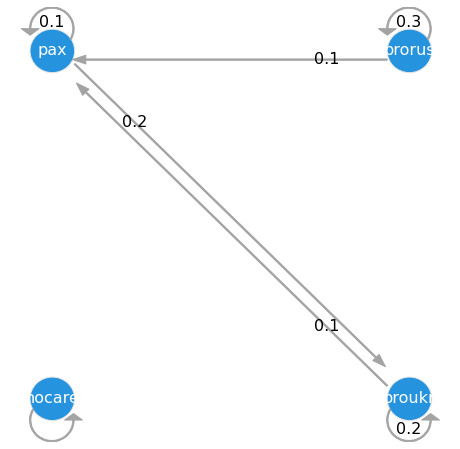

In [7]:
mc = MarkovChain(P, states)
mc.draw()

## Algorithmic Bias

The Algorithmic Bias model considers a population of individuals, where each individual holds a continuous opinion in the interval [0,1]. Individuals are connected by a social network, and interact pairwise at discrete time steps. The interacting pair is selected from the population at each time point in such a way that individuals that have close opinion values are selected more often, to simulate algorithmic bias.
After interaction, the two opinions may change, depending on a so called bounded confidence parameter, epsilon. This can be seen as a measure of the open-mindedness of individuals in a population. It defines a threshold on the distance between the opinion of the two individuals, beyond which communication between individuals is not possible due to conflicting views. Thus, if the distance between the opinions of the selected individuals is lower than epsilon, the two individuals adopt their average opinion. Otherwise nothing happens.
Source: https://ndlib.readthedocs.io/en/latest/reference/models/opinion/AlgorithmicBias.html

In [8]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

no display found. Using non-interactive Agg backend


In [2]:
G=nx.read_gexf('final_net.gexf')
df=pd.read_csv('df_final_nodes.csv')

In [10]:
model = op.AlgorithmicBiasModel(G)
model.available_statuses

{'Infected': 0}

In [11]:
infected_nodes=[]
susceptible_nodes=[]
for i,c in enumerate(df.category):
    if c=='dontcare' or c=='prorus' or c=='proukr':
        susceptible_nodes.append(df['node'][i])
    else:
        infected_nodes.append(df['node'][i]) 

In [12]:
len(infected_nodes)

2165

In [13]:
config = mc.Configuration()
config.add_model_initial_configuration("Infected", infected_nodes)

In [14]:
# Model configuration
config.add_model_parameter("epsilon", 0.20)
config.add_model_parameter("gamma", 50)

In [15]:
model.set_initial_status(config)
model.initial_status

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [29]:
iterations = model.iteration_bunch(100, progress_bar =True, node_status=True)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


TypeError: object of type 'NoneType' has no len()

In [ ]:
iterations

In [ ]:
trends = model.build_trends(iterations)

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [ ]:
viz = OpinionEvolution(model, iterations)
viz.plot("opinion_ev.pdf")

## SI model

Each individual has β contacts with randomly chosen others individuals per unit time.

If there are I infected individual and S susceptible individuals, the average rate of new infection is βsi/N

In [43]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [44]:
G=nx.read_gexf('final_net.gexf')
df=pd.read_csv('df_final_nodes.csv')
#del df['Unnamed: 0']

In [45]:
infected_nodes=[]
susceptible_nodes=[]
for i,c in enumerate(df.category):
    if c=='dontcare' or c=='prorus' or c=='proukr':
        susceptible_nodes.append(df['node'][i])
    else:
        infected_nodes.append(df['node'][i]) 

In [46]:
len(infected_nodes)

2165

In [47]:
model = ep.SIModel(G)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [48]:
#set status
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)
cfg.add_model_initial_configuration("Susceptible", susceptible_nodes )

In [49]:
cfg.add_model_parameter('beta', 0.2) # infection rate sum pax column(or raw) - pax
#cfg.add_model_parameter("percentage_infected", 0.1) #pax
model.set_initial_status(cfg)

In [50]:
iterations = model.iteration_bunch(500, node_status=True)
trends = model.build_trends(iterations)

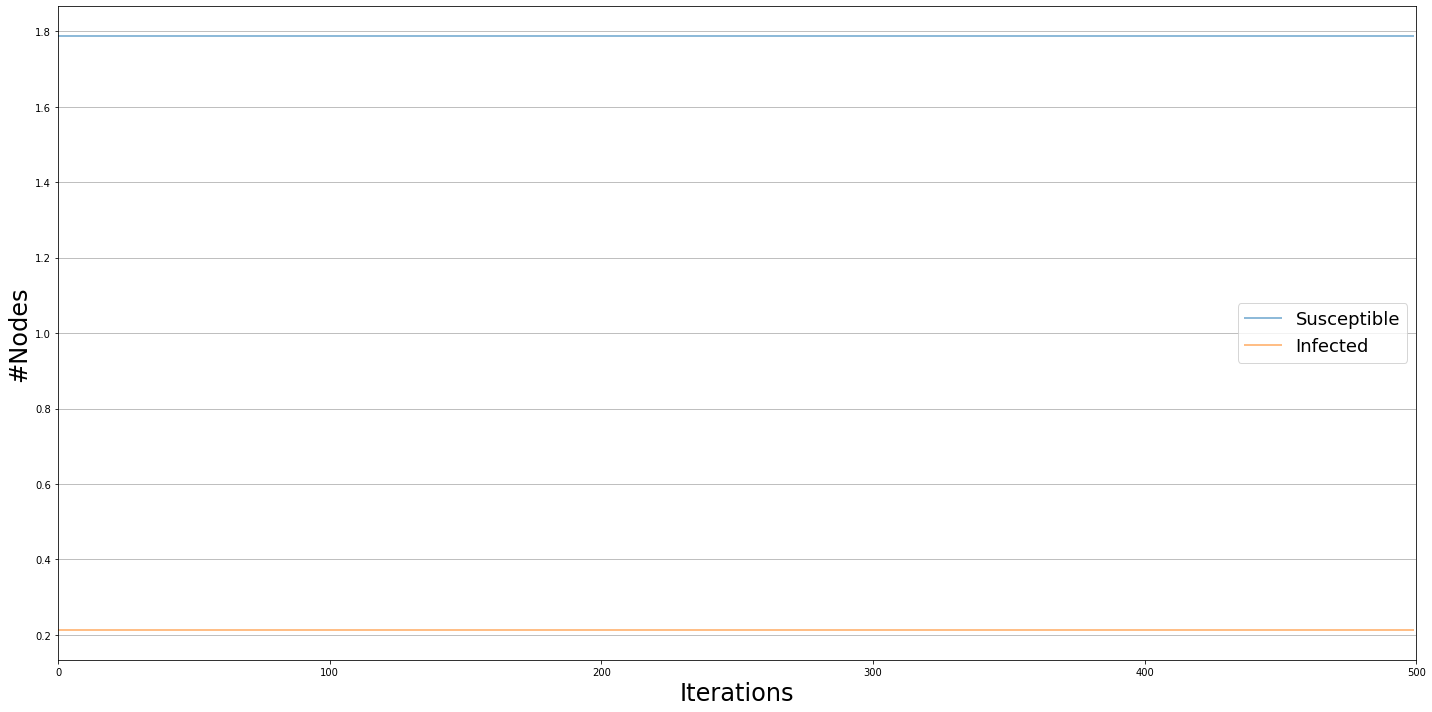

In [131]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

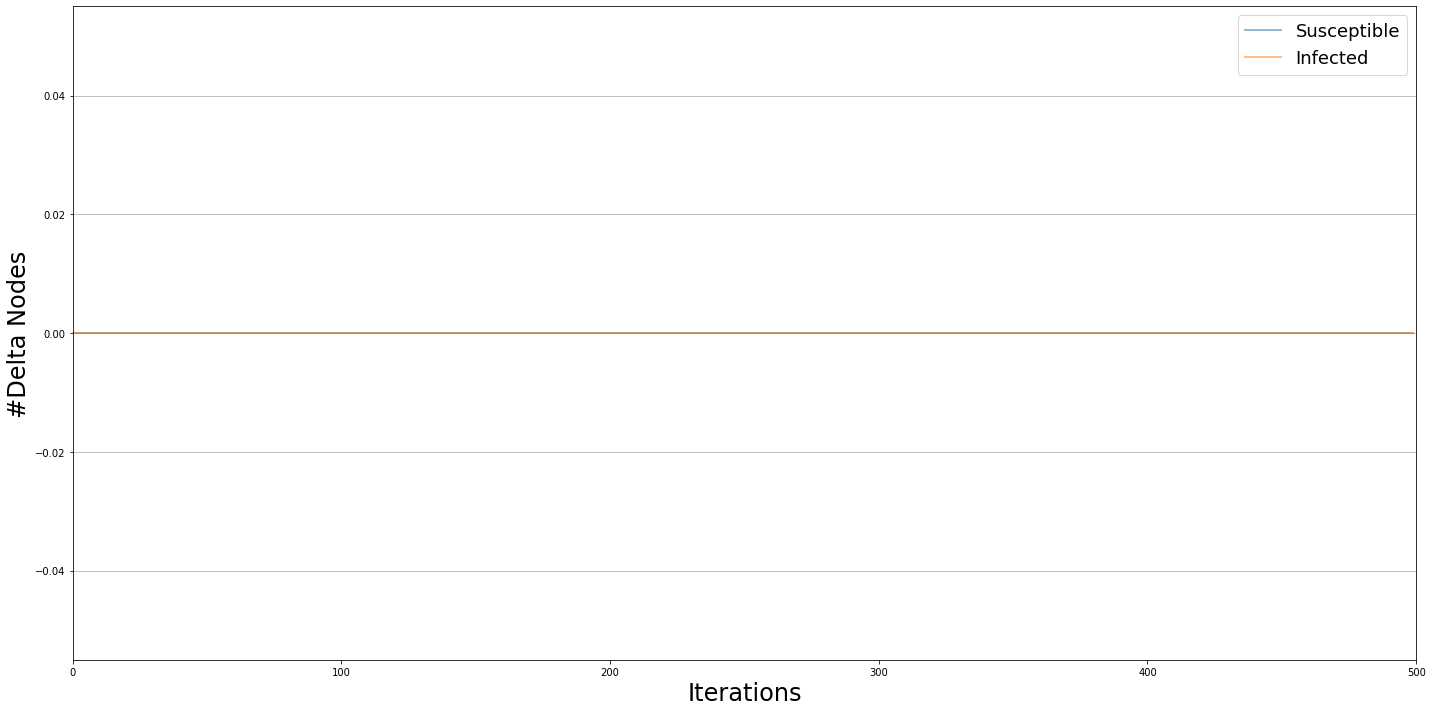

In [132]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Cognitive Opinion Dynamics

In [8]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

In [9]:
G=nx.read_gexf('final_net.gexf')
df=pd.read_csv('df_final_nodes.csv')
#del df['Unnamed: 0']

In [10]:
infected_nodes=[]
susceptible_nodes=[]
for i,c in enumerate(df.category):
    if c=='dontcare' or c=='prorus' or c=='proukr':
        susceptible_nodes.append(df['node'][i])
    else:
        infected_nodes.append(df['node'][i]) 
len(infected_nodes)

2165

In [11]:
model = op.CognitiveOpDynModel(G)
config = mc.Configuration()

In [12]:
#set status
config.add_model_initial_configuration("Infected", infected_nodes)

In [13]:
config.add_model_parameter("I", 0.2)
config.add_model_parameter("B_range_min", 0)
config.add_model_parameter("B_range_max", 1)
config.add_model_parameter("T_range_min", 0)
config.add_model_parameter("T_range_max", 1)
config.add_model_parameter("R_fraction_negative", 0.3) #prorus
config.add_model_parameter("R_fraction_neutral", 0.3)  #pax+nocare
config.add_model_parameter("R_fraction_positive", 0.4) #proukr

In [14]:
model.set_initial_status(config)

In [ ]:
iterations = model.iteration_bunch(200, progress_bar =True, node_status=True)

 20%|████████████████▏                                                                | 40/200 [02:10<08:24,  3.15s/it]

In [16]:
iterations = model.iteration()

In [17]:
iterations

{'iteration': 0,
 'status': {'290883': 0.26102521071543505,
  '1471971': 0.6602291990192166,
  '2052911': 0.3389343996090797,
  '2827221': 0.20245648507527914,
  '3688111': 0.023067648719699352,
  '4254951': 0.7779358180747283,
  '4615341': 0.047864626568945745,
  '4937571': 0.594541494330028,
  '5404582': 0.5806460801686236,
  '5516892': 0.4707000230535415,
  '5749002': 0.09991792559478563,
  '5849252': 0.5144298063562714,
  '6266142': 0.06617374316175795,
  '6691762': 0.6686445763736191,
  '7078452': 0.1992291856785866,
  '7703052': 0.285043783883691,
  '7777302': 0.73567943938386,
  '8007502': 0.23622908130833842,
  '8052182': 0.897064031325966,
  '9063952': 0.36152566064457026,
  '9147152': 0.5883192867875429,
  '9731332': 0.2962203056812913,
  '11025592': 0.08936390469235922,
  '11076222': 0.6369547627928549,
  '11486222': 0.5235008409621955,
  '11567702': 0.4347665688945015,
  '12512292': 0.4193117185891819,
  '12610772': 0.21762880780122096,
  '13301942': 0.6043663211849798,
  '

In [18]:
trends = model.build_trends(iterations)

TypeError: string indices must be integers

In [19]:
trends = model.build_trends(iterations)
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

no display found. Using non-interactive Agg backend


NameError: name 'trends' is not defined